In [1]:
import joblib
import numpy as np
import pandas as pd
import os
import sys
import torch
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../")

In [2]:
all_prototypes = torch.load("../artifacts/all_protos.pt")

In [3]:
best_protos_per_testeg = joblib.load("../artifacts/best_protos_per_testeg.joblib")
best_protos_per_traineg = joblib.load("../artifacts/best_protos_per_traineg.joblib")
best_protos_per_adv = joblib.load("../artifacts/best_protos_per_adv.joblib")
bestk_train_data_per_proto = joblib.load("../artifacts/bestk_train_data_per_proto.joblib")

Text(0.5, 1.0, 'Adv')

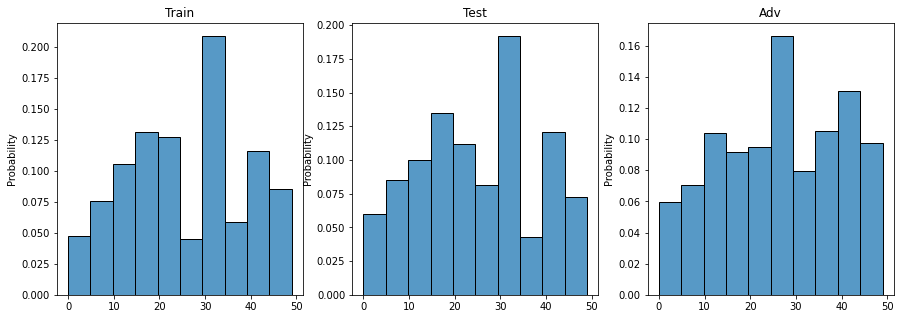

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

train_prototypes_counts = best_protos_per_traineg[0].flatten().numpy()
sns.histplot(train_prototypes_counts, bins=10, stat="probability", label="train", ax=axs[0])
axs[0].set_title("Train")

test_proto_counts = best_protos_per_testeg[0].flatten().numpy()
sns.histplot(test_proto_counts, bins=10, stat="probability", label="test", ax=axs[1])
axs[1].set_title("Test")

adv_proto_counts = best_protos_per_adv['adv_test.csv'][0].flatten().numpy()
sns.histplot(adv_proto_counts, bins=10, stat="probability", label="adv", ax=axs[2])
axs[2].set_title("Adv")

(50, 2)


<Axes: xlabel='Y', ylabel='X'>

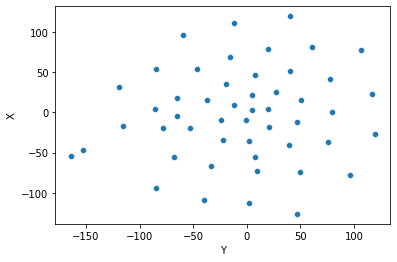

In [5]:
from sklearn.manifold import TSNE
all_protos = all_prototypes.reshape(50, -1)
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2)
all_protos_transformed = tsne.fit_transform(all_protos)
print(all_protos_transformed.shape)

proto_df = {
    "X": all_protos_transformed[:,0].tolist(),
    "Y": all_protos_transformed[:,1].tolist()
}
sns.scatterplot(data=proto_df, x="Y", y="X")

In [6]:
train_distances = best_protos_per_traineg[1].flatten()
test_distances = best_protos_per_testeg[1].flatten()
adv_distances = best_protos_per_adv["adv_test.csv"][1].flatten()

Text(0.5, 1.0, 'Adv')

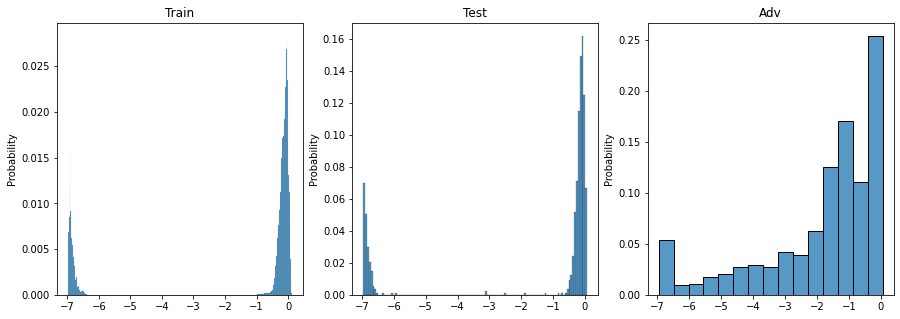

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train_distances, label="train", stat="probability", ax=axs[0])
axs[0].set_title("Train")

sns.histplot(test_distances, label="test", stat="probability", ax=axs[1])
axs[1].set_title("Test")

sns.histplot(adv_distances, label="adv", stat="probability", ax=axs[2])
axs[2].set_title("Adv")

In [31]:
train_df = pd.read_csv("../data/glue_data/sst2/train.csv")
val_df = pd.read_csv("../data/glue_data/sst2/val.csv")
test_df = pd.read_csv("../data/glue_data/sst2/test.csv")
adv_df = pd.read_csv("../data/glue_data/sst2/adv_test.csv")

In [34]:
best_protos_per_testeg[0].shape

torch.Size([174, 5])